In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import pyabf

In [4]:
abf_base=pyabf.ABF("../data/6-OHDA PPR sample trace/VM_Baseline.abf")
abf_dur=pyabf.ABF("../data/6-OHDA PPR sample trace/VM_duringQP.abf")
abf_after=pyabf.ABF("../data/6-OHDA PPR sample trace/VM_afterQP.abf")

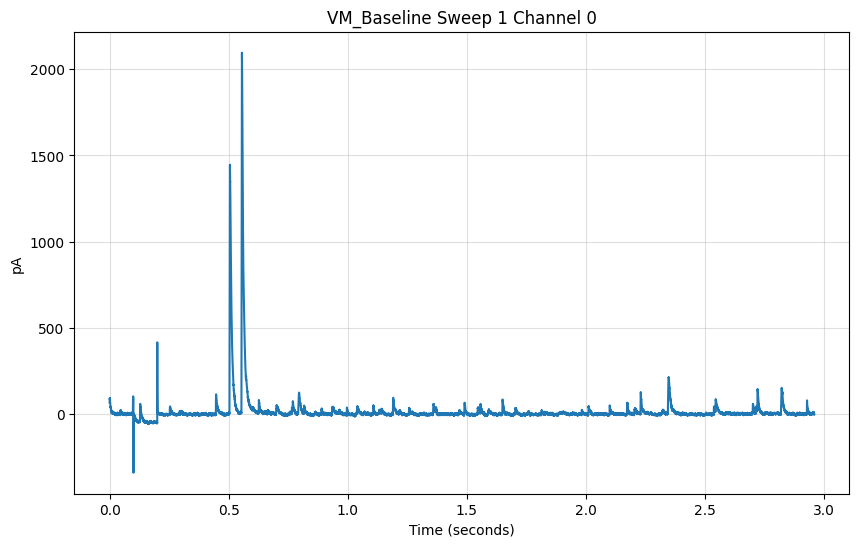

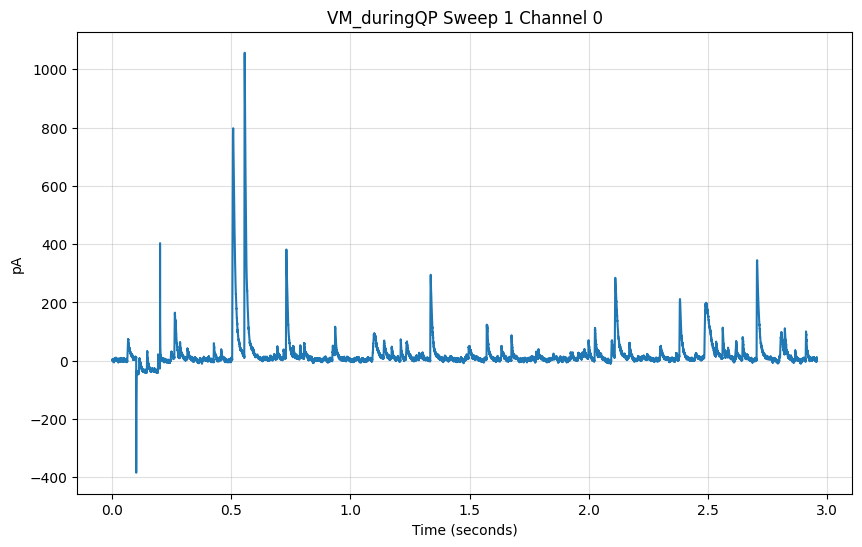

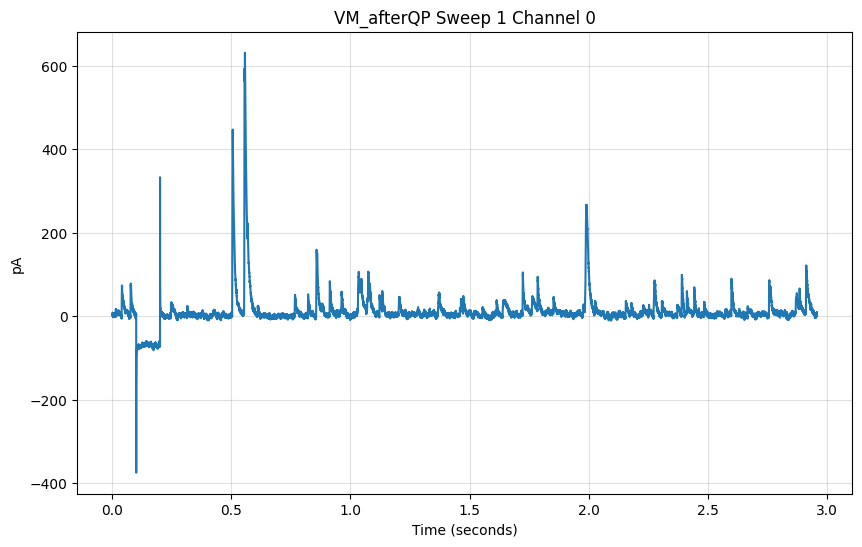

In [5]:
channel_index = 0
sweep_number = 0

data_base = abf_base.sweepY
time_base = abf_base.sweepX


data_dur = abf_dur.sweepY
time_dur = abf_dur.sweepX


data_after = abf_after.sweepY
time_after = abf_after.sweepX

# Access metadata (e.g., sampling rate)
sampling_rate = abf_base.sampleRate
plt.figure(figsize=(10, 6))
plt.plot(time_base, data_base)
plt.xlabel("Time (seconds)")
plt.ylabel("pA")
plt.title(f"{abf_base.abfID} Sweep {sweep_number+1} Channel {abf_base.channelList[channel_index]}")
plt.grid(alpha=0.4)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(time_dur, data_dur)
plt.xlabel("Time (seconds)")
plt.ylabel("pA")
plt.title(f"{abf_dur.abfID} Sweep {sweep_number+1} Channel {abf_dur.channelList[channel_index]}")
plt.grid(alpha=0.4)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_after, data_after)
plt.xlabel("Time (seconds)")
plt.ylabel("pA")
plt.title(f"{abf_after.abfID} Sweep {sweep_number+1} Channel {abf_after.channelList[channel_index]}")
plt.grid(alpha=0.4)
plt.show()

In [7]:
abf_base

ABF (v2.9) with 1 channel (pA), sampled at 10.035 kHz, containing 1 sweep, having no tags, with a total length of 0.02 minutes, recorded without a protocol file. path=/Users/reva/Documents/Python/SPSynapse/data/WT PPR sample trace/DL_Baseline.abf

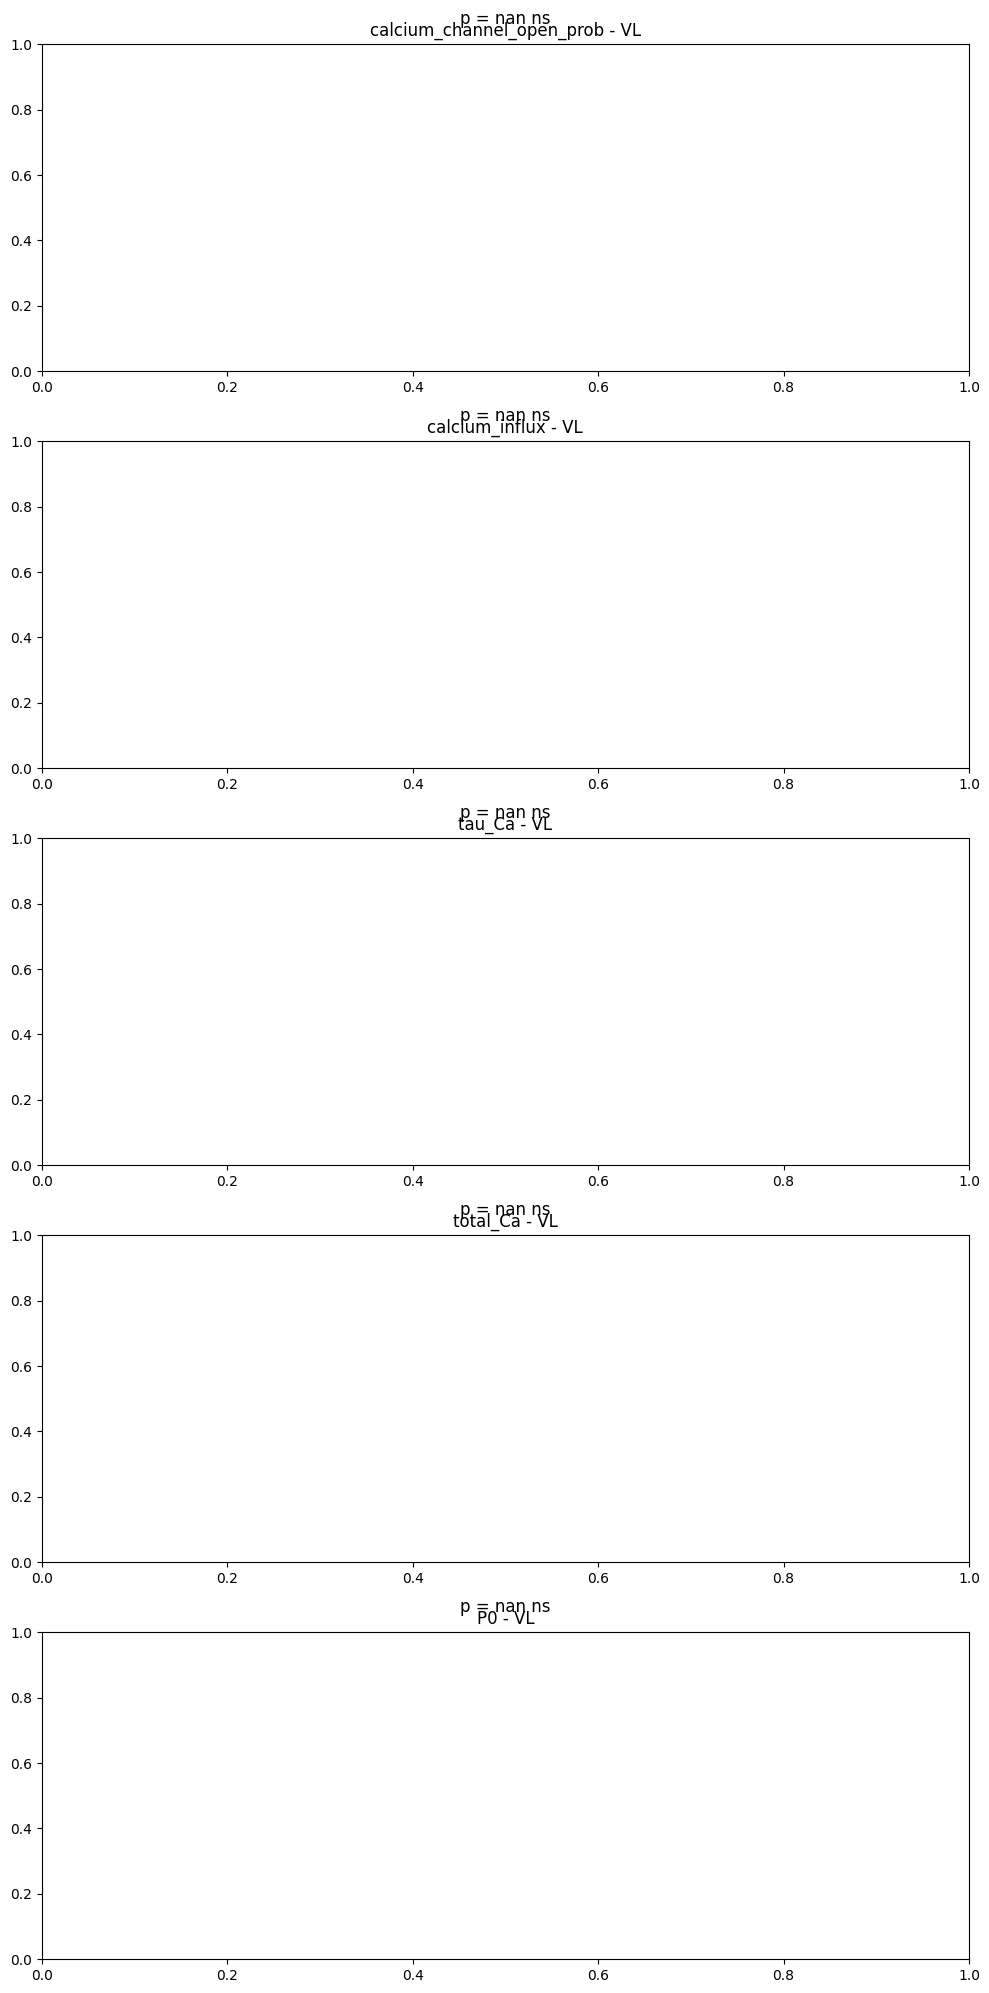

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution, basinhopping
from scipy.stats import mannwhitneyu, wilcoxon
import utils 
import warnings
import pandas as pd
import seaborn as sns

df_all=pd.read_csv("/Users/reva/Documents/Python/SPSynapse/DF_All_VL.csv")
# List of parameters to analyze
parameters = ['calcium_channel_open_prob', 'calcium_influx', 'tau_Ca', 'total_Ca', 'P0']
region="DM"
# Loop over each region and plot
fig, axes = plt.subplots(len(parameters), 1, figsize=(10, len(parameters)*4))
region_data = df_all[df_all['Region'] == region]

for i, param in enumerate(parameters):
    sns.violinplot(data=region_data, x='Condition', y=param, ax=axes[i], inner=None, palette="Set2")
    sns.scatterplot(data=region_data, x='Condition', y=param, ax=axes[i], color="black", s=50)
    axes[i].set_title(f'{param} - {"VL"}')

    # Statistical test (Mann-Whitney U test)
    control_data = region_data[region_data['Condition'] == '10uM QP'][param]
    quinpirole_data = region_data[region_data['Condition'] == 'Quinpirole'][param]
    stat, p_value = wilcoxon(control_data, quinpirole_data)

    # Mark statistical significance
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'ns'  # not significant

    axes[i].text(0.5, 1.05, f'p = {p_value:.4f} {significance}', ha='center', va='bottom', 
                    transform=axes[i].transAxes, fontsize=12)

plt.tight_layout()
plt.show()
#plt.savefig(f"Stat_VL.pdf")

In [15]:
# Perform Wilcoxon signed-rank test for paired data

dataset1 = [0.000895955,
0.000525044,
0.000788677,
0.000982103,
0.000916146,
0.000294185,
0.000896994,
0.000568387,
0.000644246,
0.000459898]

dataset2 = [0.000895955,
0.000525044,
0.000788677,
0.000982103,
0.000916146,
0.000294185,
0.000896994,
0.000568387,
0.000644246,
0.000459898]

wilcoxon_stat, wilcoxon_p_value = wilcoxon(dataset1, dataset2)

# Display the Wilcoxon signed-rank test results
wilcoxon_stat, wilcoxon_p_value


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.